**EXPLORATORY DATA ANALYSIS**

In [1]:
#Impoting Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import re
%matplotlib inline



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Fetchind data from the drive and displaying
df=pd.read_csv('/content/drive/MyDrive/climate_change_impact_on_agriculture_2024.csv')
df.head(5)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [4]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [5]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [6]:
df.dtypes

,0
Year,int64
Country,object
Region,object
Crop_Type,object
Average_Temperature_C,float64
Total_Precipitation_mm,float64
CO2_Emissions_MT,float64
Crop_Yield_MT_per_HA,float64
Extreme_Weather_Events,int64
Irrigation_Access_%,float64


In [7]:
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


**EXPLORATORY DATA ANALYSIS**

In [8]:
df['Country'].value_counts()

,count
Country,
USA,1032
Australia,1032
China,1031
Nigeria,1029
India,1025
Canada,984
Argentina,984
France,978
Russia,961


In [9]:
#The count of Crop type as provided by the data
df['Crop_Type'].value_counts()

,count
Crop_Type,
Wheat,1047
Cotton,1044
Vegetables,1036
Corn,1022
Rice,1022
Sugarcane,995
Fruits,979
Soybeans,958
Barley,952


In [10]:
#The amount of each crop type in Nigeria
df[df['Country']== 'Nigeria']['Crop_Type'].value_counts()

,count
Crop_Type,
Sugarcane,122
Rice,112
Corn,111
Soybeans,107
Cotton,107
Barley,103
Wheat,103
Vegetables,94
Coffee,86


In [11]:
df.groupby('Year').agg({'Crop_Yield_MT_per_HA':'count', 'Economic_Impact_Million_USD':'sum'})
#Group by year and calculate count for 'Crop_Yield_MT_per_HA' and sum for 'Economic_Impact_Million_USD'

,Crop_Yield_MT_per_HA,Economic_Impact_Million_USD
Year,,
1990,250,172438.84
1991,314,206534.15
1992,274,179923.58
1993,257,173001.60
1994,305,198388.16
1995,277,172247.61
1996,295,194723.83
1997,287,195560.82
1998,239,172838.96


array([<Axes: ylabel='count'>], dtype=object)

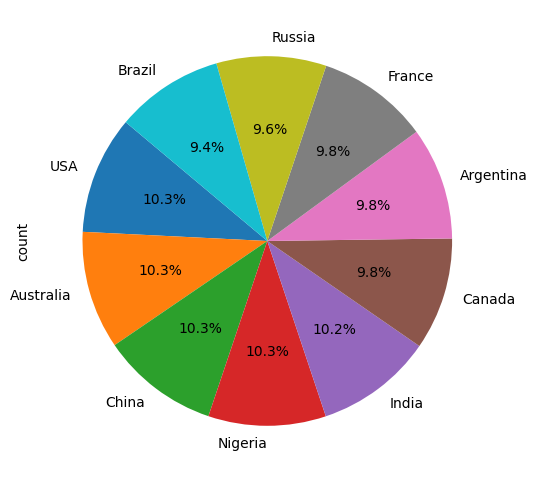

In [12]:
df['Country'].value_counts().plot.pie(subplots=True, figsize=(6, 6),autopct='%1.1f%%', startangle=140)

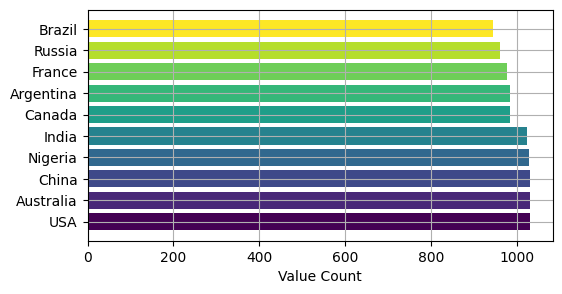

In [13]:
c_counts = df['Country'].value_counts()
plt.figure(figsize=(6,3))
colors = cm.viridis(np.linspace(0, 1, len(c_counts.values)))
plt.barh(c_counts.index,c_counts.values, color=colors)
plt.xlabel('Value Count')
plt.grid()
plt.show()

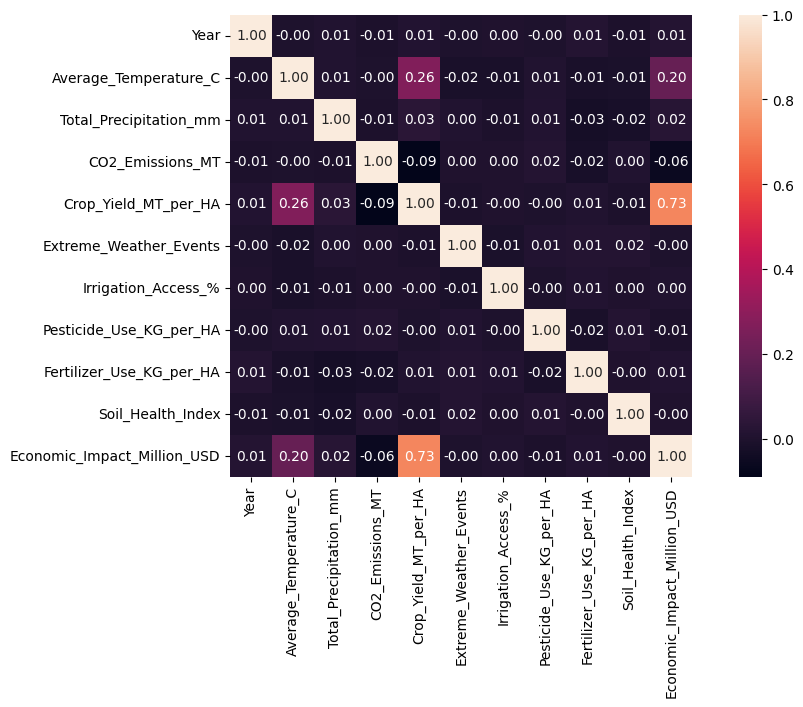

In [14]:
# correlation matrix
plt.figure(figsize=(12,6))
corr_mat = df.corr(numeric_only=True)
sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()



1.   The target variable Crop_Yield_MT_per_HA shows a strong positive correlation (0.73) with Economic_Impact_Million_USD. This is likely the most significant feature in Our dataset for predicting crop yield, but it might also indicate some overlap in what these variables represent (since they could both be driven by similar factors).

2.   Average_Temperature_C also has a moderate positive correlation of 0.26 with crop yield, suggesting it can provide useful information.


3.   Most other features like Total_Precipitation_mm, CO2_Emissions_MT, Extreme_Weather_Events, and Fertilizer_Use_KG_per_HA show very weak or near-zero correlations with the target variable.

















array([<Axes: ylabel='count'>], dtype=object)

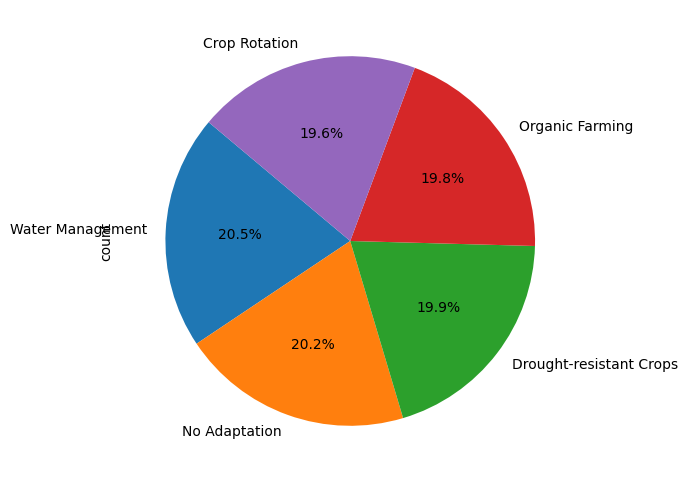

In [15]:
#Pie plot to shoe which Adaptive strategy was mostly applied
df['Adaptation_Strategies'].value_counts().plot.pie(subplots=True, figsize=(11, 6),autopct='%1.1f%%', startangle=140)

array([<Axes: ylabel='count'>], dtype=object)

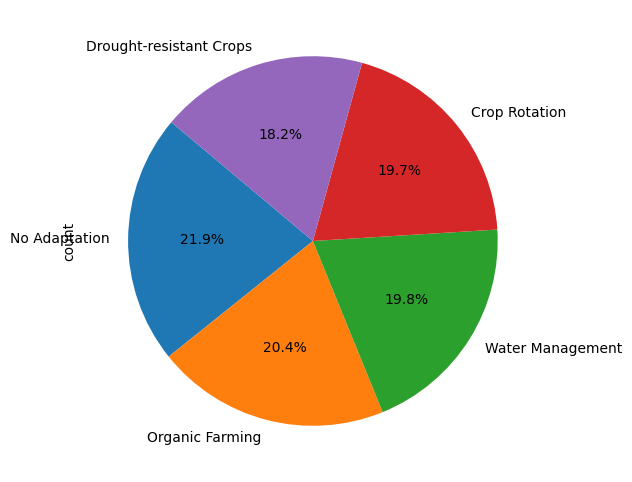

In [16]:
df1=df[df['Country']=='Nigeria']
df1['Adaptation_Strategies'].value_counts().plot.pie(subplots=True, figsize=(11, 6),autopct='%1.1f%%', startangle=140)

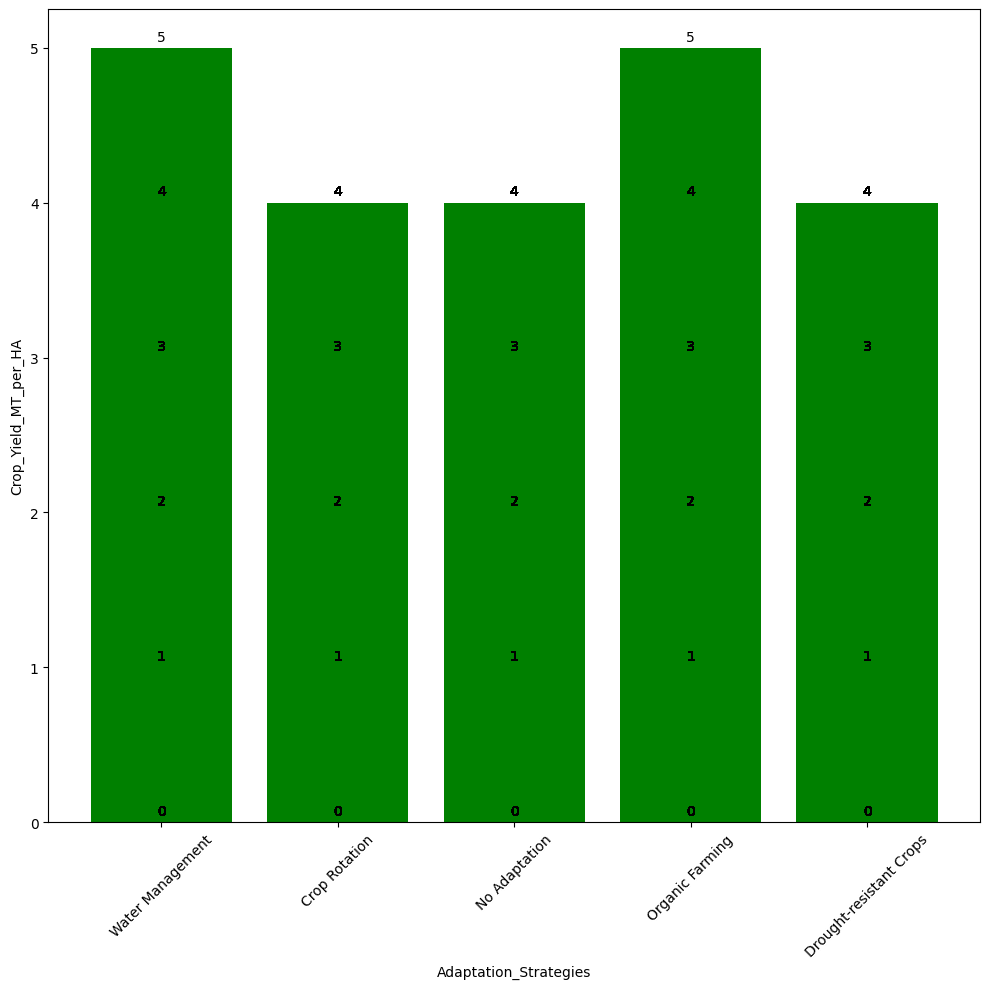

In [24]:
df['Crop_Yield_MT_per_HA']=df['Crop_Yield_MT_per_HA'].astype(int)
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.bar(df['Adaptation_Strategies'], df['Crop_Yield_MT_per_HA'], color='green')
plt.xlabel ('Adaptation_Strategies')
plt.ylabel('Crop_Yield_MT_per_HA')
plt.xticks(rotation=45)
plt.tight_layout()
ax.bar_label(bars, padding=3)

plt.show()

Water Management and Organic Farming both have the highest crop yields, achieving 5 MT/HA. This suggests that these two strategies are the most effective in improving agricultural productivity among the listed strategies.
Crop Rotation, No Adaptation, and Drought-Resistant Crops all have a slightly lower maximum yield of 4 MT/HA. These strategies may still be effective but appear less productive compared to Water Management and Organic Farming.

The plot clearly demonstrates that certain adaptation strategies, particularly Water Management and Organic Farming, have a more significant positive impact on crop yields than others. This insight can be used by farmers and agricultural planners to prioritize strategies that maximize crop productivity.